# Лабораторная работа №1 Фруктин А.Е.

## Phone price prediction

About Dataset

This dataset is a collection of mobile phones from different brands, with different specifications and price ranges. It can be used for analysis, comparison, or recommendation purposes in the mobile phone industry. Here's a breakdown of the columns:

Features:

Unnamed: 0: This is an index or identifier for each entry in the dataset.
Brand:The brand name of the mobile phone.
Ratings: The user ratings for the mobile phone on a scale of 1 to 5.
RAM: The amount of RAM (Random Access Memory) in the mobile phone, usually measured in gigabytes (GB).
ROM: The amount of ROM (Read-Only Memory) or storage capacity in the mobile phone, usually measured in gigabytes (GB).
Mobile_Size: The size of the mobile phone referring to the display size in inches.
Primary_Cam: The resolution of the primary camera in the mobile phone in megapixels.
Selfi_Cam: The resolution of the front or selfie camera in the mobile phone in megapixels.
Battery_Power: The battery capacity of the mobile phone in milliampere-hours (mAh).
Price: The price of the mobile phone in the local currency.

# Основные характеристики датасета.

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

data = pd.read_csv('./mobile.csv', sep=",")

data.head()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [25]:
# Количество строк и столбцов
data.shape

(836, 10)

In [26]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 836


In [27]:
# Список колонок
data.columns

Index(['Unnamed: 0', 'Brand me', 'Ratings', 'RAM', 'ROM', 'Mobile_Size',
       'Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Price'],
      dtype='object')

In [28]:
data.dtypes

Unnamed: 0         int64
Brand me          object
Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

In [29]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Unnamed: 0 - 0
Brand me - 0
Ratings - 31
RAM - 7
ROM - 4
Mobile_Size - 2
Primary_Cam - 0
Selfi_Cam - 269
Battery_Power - 0
Price - 0


In [30]:
# Основные статистические характеристки набора данных
data.describe()

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,836.000000,805.000000,829.000000,832.000000,834.000000,836.000000,567.000000,836.000000,836.00000
mean,417.500000,4.103106,6.066345,64.373077,5.217426,47.983254,9.784832,3274.688995,18220.34689
std,241.476707,0.365356,2.530336,53.447825,0.951547,11.170093,6.503838,927.518852,52805.55022
min,0.000000,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,208.750000,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,984.75000
50%,417.500000,4.100000,6.000000,40.000000,4.700000,48.000000,8.000000,3000.000000,1697.00000
75%,626.250000,4.400000,6.000000,64.000000,6.260000,48.000000,13.000000,3800.000000,18999.00000
max,835.000000,4.800000,34.000000,256.000000,7.000000,64.000000,61.000000,6000.000000,573000.00000


In [31]:

# Определим уникальные значения для целевого признака
data['Mobile_Size'].unique()

array([6.   , 4.5  , 6.4  , 6.18 , 5.8  , 6.7  , 6.53 , 4.54 , 5.5  ,
       4.7  , 6.67 , 3.7  , 6.2  , 2.   , 4.77 , 6.1  , 5.4  , 4.52 ,
       6.5  , 6.39 , 4.4  , 5.99 , 5.   , 5.7  , 6.41 , 6.3  , 4.58 ,
       4.57 ,   nan, 6.28 , 4.8  , 6.08 , 6.22 , 4.503, 6.26 , 6.38 ,
       6.44 , 5.84 , 6.35 , 6.6  , 7.   , 6.55 , 6.59 , 5.6  , 6.52 ,
       5.9  , 5.65 ])

# Визуальное исследование датасета

Диаграмма рассеивания

<Axes: xlabel='Ratings', ylabel='Price'>

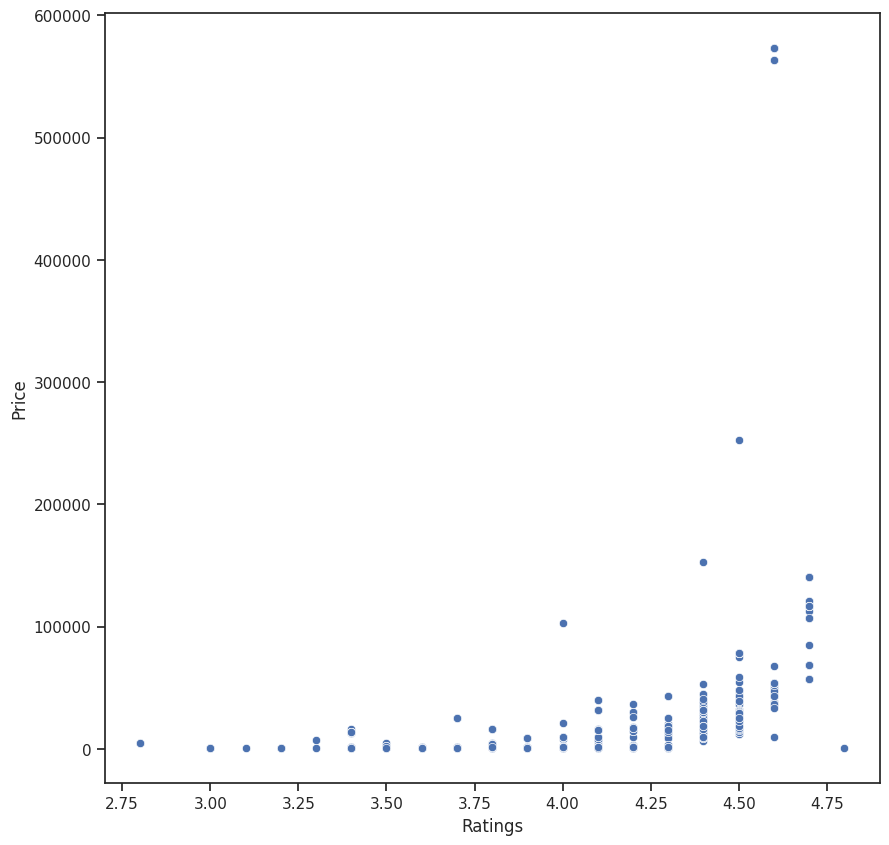

In [32]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Ratings', y='Price', data=data)

<Axes: xlabel='Ratings', ylabel='Price'>

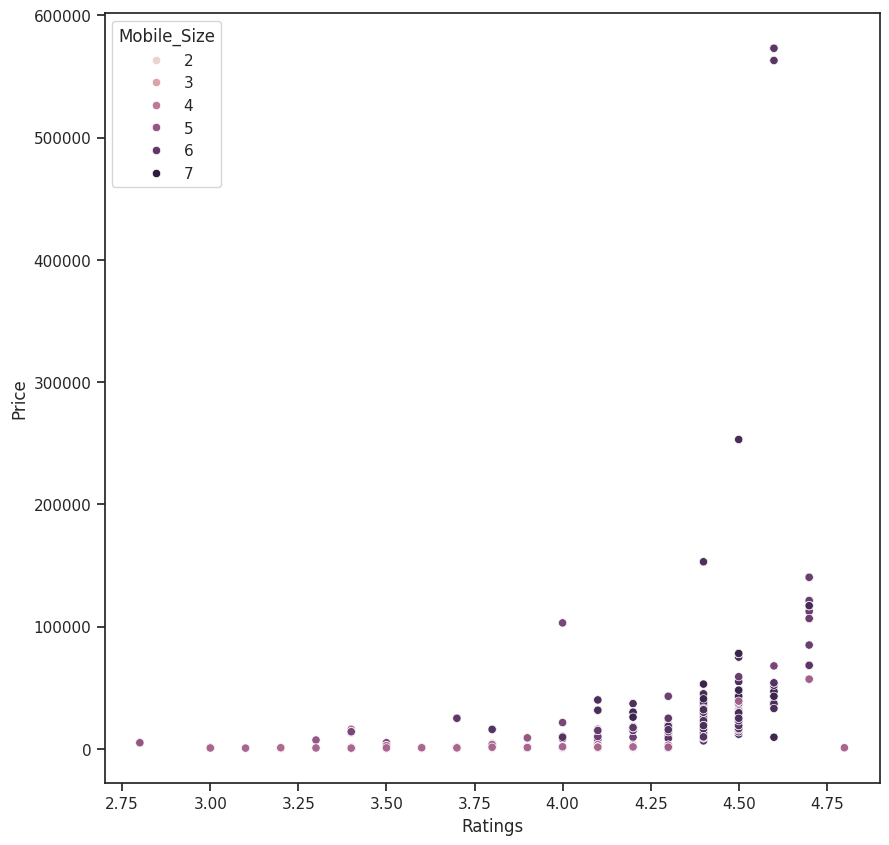

In [33]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Ratings', y='Price', data=data, hue='Mobile_Size')

/tmp/ipykernel_78260/1695101400.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Ratings'])


<Axes: xlabel='Ratings', ylabel='Density'>

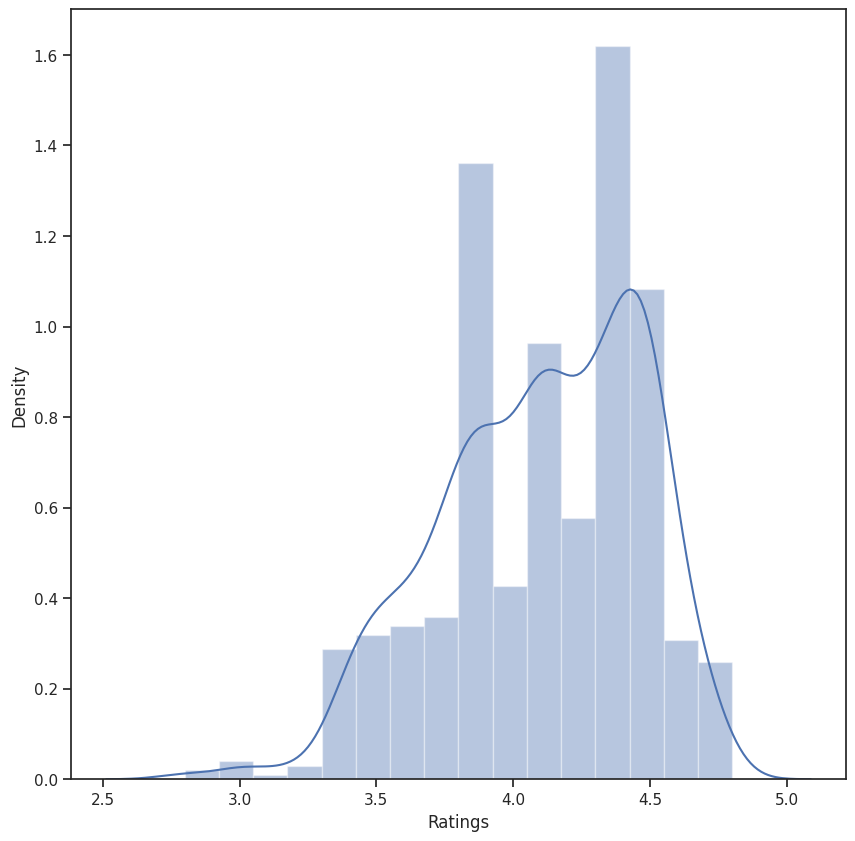

In [34]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Ratings'])

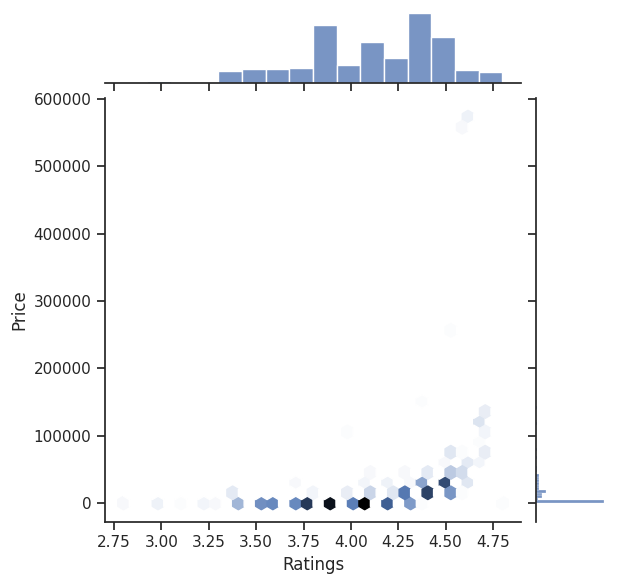

In [35]:
sns.jointplot(x='Ratings', y='Price', data=data, kind='hex')

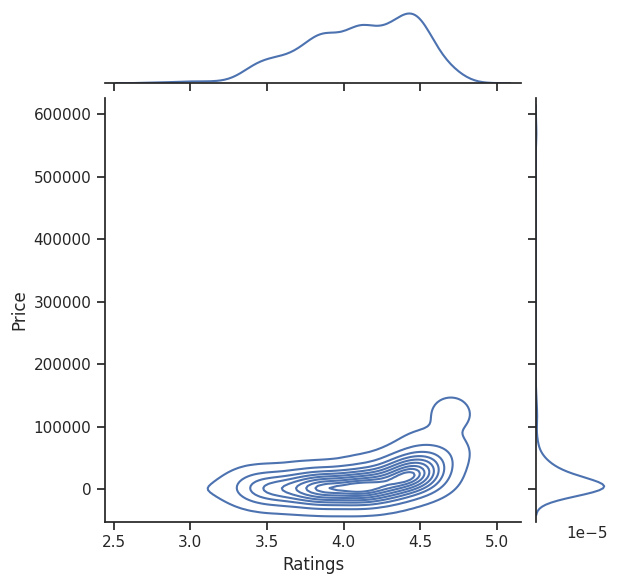

In [36]:
sns.jointplot(x='Ratings', y='Price', data=data, kind="kde")

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

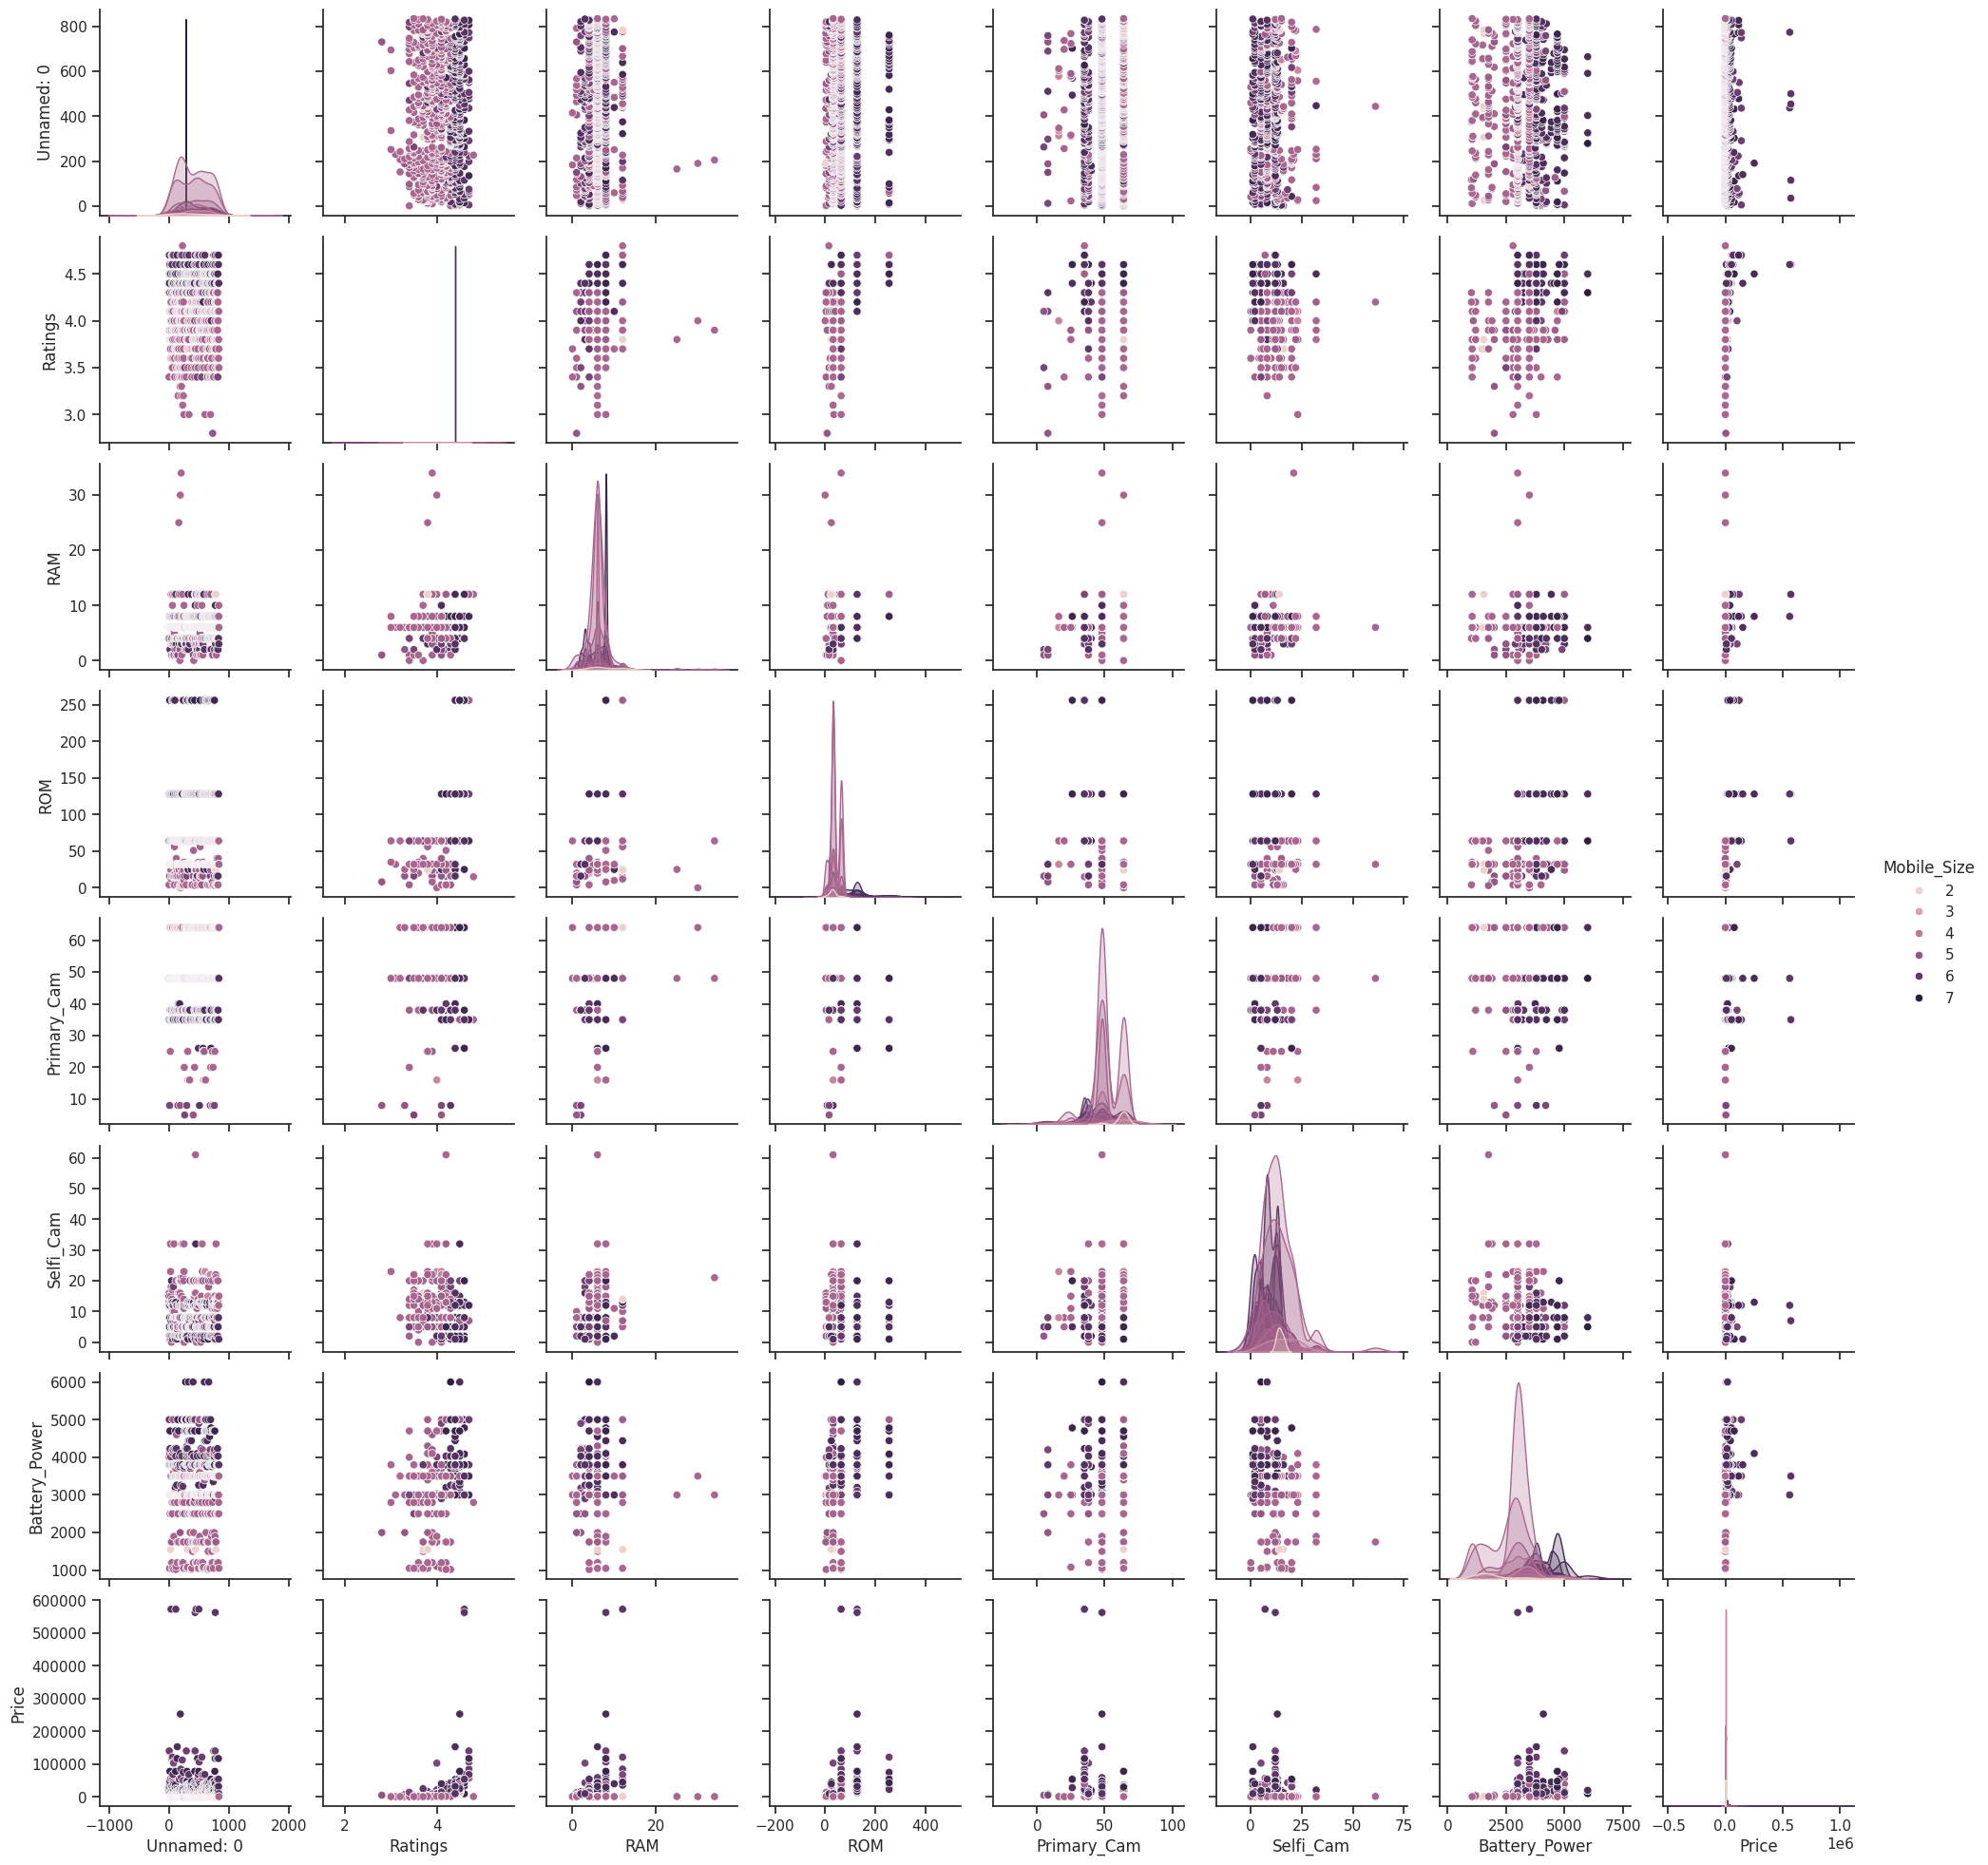

In [38]:
sns.pairplot(data, hue="Mobile_Size")

<Axes: ylabel='Mobile_Size'>

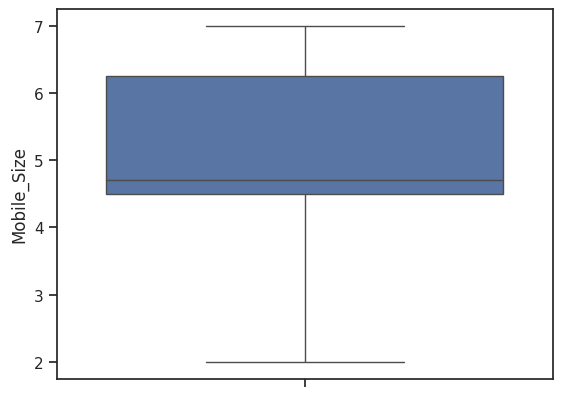

In [39]:
sns.boxplot(y=data['Mobile_Size'])

<Axes: xlabel='Mobile_Size', ylabel='Price'>

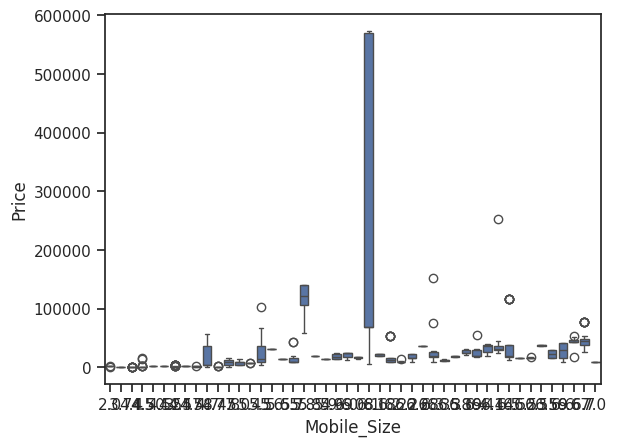

In [40]:
sns.boxplot(x='Mobile_Size', y='Price', data=data)

# Информация о корреляции признаков

In [41]:
data.corr(numeric_only=True, method='pearson')

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
Unnamed: 0,1.000000,0.036258,-0.002807,0.041192,0.038483,0.048192,0.064597,-0.009143,-0.010725
Ratings,0.036258,1.000000,0.101002,0.458957,0.668371,-0.098439,-0.176199,0.478596,0.367021
RAM,-0.002807,0.101002,1.000000,0.252041,0.005938,0.141025,0.211169,0.023227,0.236988
ROM,0.041192,0.458957,0.252041,1.000000,0.626735,-0.070019,-0.116891,0.410130,0.255682
Mobile_Size,0.038483,0.668371,0.005938,0.626735,1.000000,-0.246999,-0.352920,0.603647,0.332119
Primary_Cam,0.048192,-0.098439,0.141025,-0.070019,-0.246999,1.000000,0.196474,-0.057011,-0.158122
Selfi_Cam,0.064597,-0.176199,0.211169,-0.116891,-0.352920,0.196474,1.000000,-0.219606,-0.047000
Battery_Power,-0.009143,0.478596,0.023227,0.410130,0.603647,-0.057011,-0.219606,1.000000,0.168626
Price,-0.010725,0.367021,0.236988,0.255682,0.332119,-0.158122,-0.047000,0.168626,1.000000


In [42]:
data.corr(numeric_only=True, method='kendall')

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
Unnamed: 0,1.000000,0.030807,0.026146,0.025817,0.027786,0.048606,0.063585,-0.002852,0.028460
Ratings,0.030807,1.000000,0.117673,0.335379,0.517020,-0.179056,-0.100204,0.408294,0.630197
RAM,0.026146,0.117673,1.000000,0.332741,0.087435,0.109554,0.196177,0.037253,0.105052
ROM,0.025817,0.335379,0.332741,1.000000,0.459088,-0.110580,-0.060129,0.357956,0.391689
Mobile_Size,0.027786,0.517020,0.087435,0.459088,1.000000,-0.228718,-0.220636,0.449227,0.634530
Primary_Cam,0.048606,-0.179056,0.109554,-0.110580,-0.228718,1.000000,0.193220,-0.088340,-0.230558
Selfi_Cam,0.063585,-0.100204,0.196177,-0.060129,-0.220636,0.193220,1.000000,-0.143541,-0.102384
Battery_Power,-0.002852,0.408294,0.037253,0.357956,0.449227,-0.088340,-0.143541,1.000000,0.374388
Price,0.028460,0.630197,0.105052,0.391689,0.634530,-0.230558,-0.102384,0.374388,1.000000


In [43]:
data.corr(numeric_only=True, method='spearman')

,Unnamed: 0,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
Unnamed: 0,1.000000,0.045033,0.034470,0.033250,0.040495,0.064391,0.087152,-0.003721,0.040929
Ratings,0.045033,1.000000,0.163928,0.475261,0.702329,-0.222838,-0.138759,0.557360,0.793827
RAM,0.034470,0.163928,1.000000,0.386783,0.120093,0.121464,0.252708,0.049949,0.150741
ROM,0.033250,0.475261,0.386783,1.000000,0.584400,-0.130715,-0.079024,0.446166,0.539878
Mobile_Size,0.040495,0.702329,0.120093,0.584400,1.000000,-0.291336,-0.307247,0.592711,0.824110
Primary_Cam,0.064391,-0.222838,0.121464,-0.130715,-0.291336,1.000000,0.244113,-0.108456,-0.300551
Selfi_Cam,0.087152,-0.138759,0.252708,-0.079024,-0.307247,0.244113,1.000000,-0.189805,-0.154400
Battery_Power,-0.003721,0.557360,0.049949,0.446166,0.592711,-0.108456,-0.189805,1.000000,0.548206
Price,0.040929,0.793827,0.150741,0.539878,0.824110,-0.300551,-0.154400,0.548206,1.000000


<Axes: >

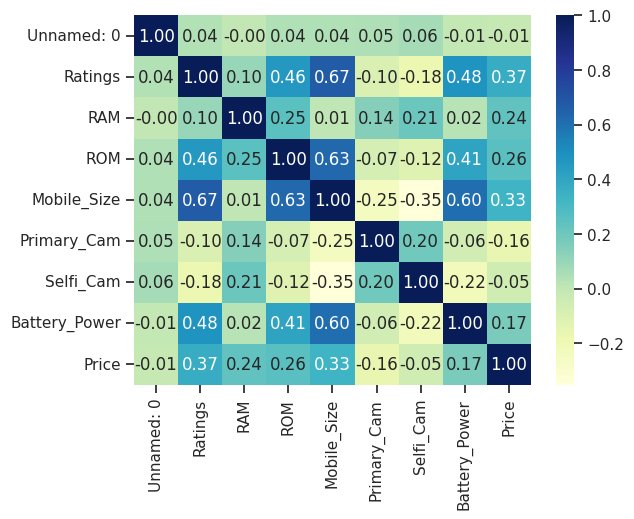

In [45]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt='.2f')